In [105]:
import numpy as np

import librosa
import librosa.display

import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load downsampled, mono audio
# 2. Trim silence form the beginning and endin
# 3. Trim silence inside track
# 4. Add filter, e.g. random noise
# 5. Divide into equal chunks (windowing) ORVERLAPPING OR NONOVERLAPPING

In [106]:
# 1.

dataset_dir = '/home/miczi/datasets/piano_and_cello/'
audio_name = 'wild.wav'
y, sample_rate = librosa.load(dataset_dir + audio_name, res_type='kaiser_fast')

# Play the original audio
print("Original audio - downsampled by librosa")
ipd.Audio(y, rate=sample_rate)

Original audio - downsampled by librosa


Original duration:  31.12063492063492
Trimmed duration:   24.68281179138322


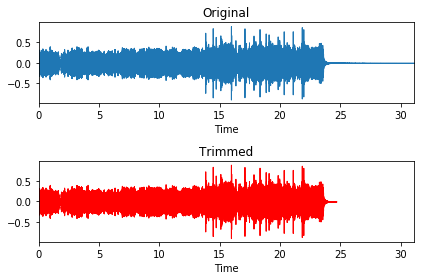

Trimmed audio


In [107]:
# 2.

# Trim the beginning and ending silence
y_trimmed, _ = librosa.effects.trim(y)

print("Original duration: ", librosa.get_duration(y))
print("Trimmed duration:  ", librosa.get_duration(y_trimmed))

figure = plt.figure()

# Trimmed audio - without silence
trimmed = figure.add_subplot(2, 1, 2)
librosa.display.waveplot(y_trimmed, sr=sample_rate, color='r')
plt.title('Trimmed')

# Original audio - with silence at the end
original = figure.add_subplot(2, 1, 1,sharex=trimmed)
librosa.display.waveplot(y, sr=sample_rate)
plt.title('Original')

plt.tight_layout()
plt.show()

# Play the original audio
print("Trimmed audio")
ipd.Audio(y_trimmed, rate=sample_rate)

In [108]:
# 3.

# It creates fake silence gaps in audio
y_with_silence = np.copy(y)
y_with_silence[10000:30000] = 0
y_with_silence[40000:60000] = 0

# it returns an array of [start, end] elements (which are non-silent)
non_silent_intervals = librosa.effects.split(y_with_silence)

# Remix could be useful - it re-orders time intervals removing silence
y_remixed = librosa.effects.remix(y_with_silence, non_silent_intervals)

# Display remixed track, without any silence
ipd.Audio(y_remixed, rate=sample_rate) 

# TRY IT OUT, JUST UNCOMMENT - Display track with fake silence gaps
# ipd.Audio(y_with_silence, rate=sample_rate) 

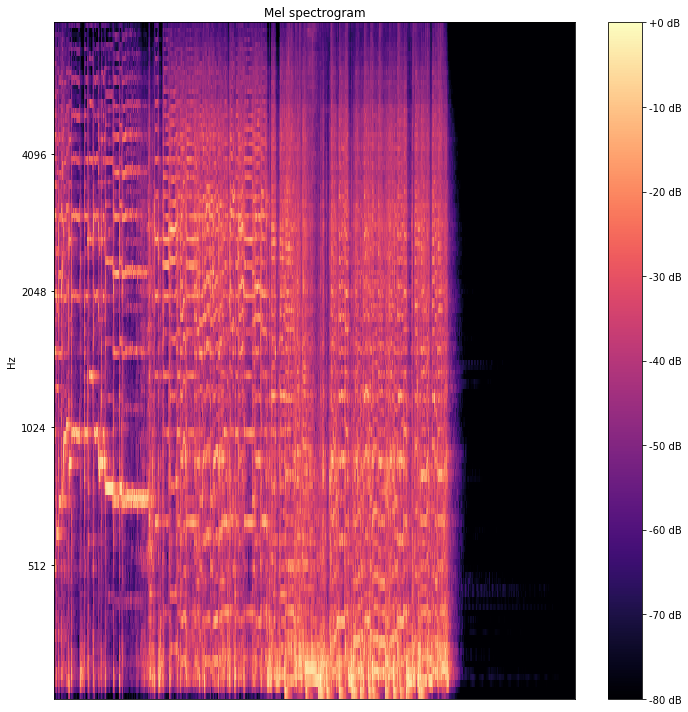

In [116]:
plt.figure(figsize=(10, 10))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()